In [1]:
#Load relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import geopandas as gpd
import datetime as dt
from scipy.spatial.distance import cdist
from shapely.geometry import Point, Polygon
warnings.filterwarnings('ignore')

In [2]:
#Load data for cities, fires 
cities = pd.read_csv('precipitation_temp_city/city_info.csv',index_col=0)
fires = pd.read_csv('Monitoring_Trends_in_Burn_Severity_Fire_Occurrence_Locations__Feature_Layer_.csv')

In [3]:
# Restrict cities to California area for purposes of project 
California = cities.loc[cities['Lon'] < -117]
California = California.loc[California['Lon'] > -124]
California = California.loc[California['Lat'] < 42.02]
California = California.loc[California['Lat'] > 32.64]
California.Name.unique()

array(['Winnemucca', 'Reno', 'Escondido', 'Ukiah', 'Sacramento',
       'Riverside', 'SanDiego', 'Redding', 'LosAngeles', 'Fresno',
       'Bakersfield'], dtype=object)

In [4]:
California =California.drop_duplicates(subset='Name', keep='last')
California.head()

,Name,ID,Lat,Lon,Stn.Name,Stn.stDate,Stn.edDate
184,Winnemucca,USW00024128,40.9017,-117.8081,WINNEMUCCA MUNICIPAL ARPT,1949-09-15,2017-12-31
186,Reno,USW00023185,39.4839,-119.7711,RENO TAHOE INTERNATIONAL AP,1937-03-01,2017-12-31
403,Escondido,USC00042863,33.1211,-117.0900,Escondido 2,1979-04-01,2017-12-31
405,Ukiah,USW00023275,39.1258,-123.2008,UKIAH MUNI AP,2000-08-01,2017-12-31
406,Sacramento,USW00023271,38.5553,-121.4183,SACRAMENTO 5 ESE,1878-01-01,2017-12-31


In [5]:
#load relevant data for each city of choice 

bakersfield_w = pd.read_csv('precipitation_temp_city/USW00023155.csv', index_col=0).reset_index(drop=True)
fresno_w = pd.read_csv('precipitation_temp_city/USW00093193.csv', index_col=0).reset_index(drop=True)
la_w = pd.read_csv('precipitation_temp_city/USW00093134.csv', index_col=0).reset_index(drop=True)
redding_w = pd.read_csv('precipitation_temp_city/USW00024257.csv', index_col=0).reset_index(drop=True)
sd_w = pd.read_csv('precipitation_temp_city/USW00023188.csv', index_col=0).reset_index(drop=True)
riverside_w = pd.read_csv('precipitation_temp_city/USW00003171.csv', index_col=0).reset_index(drop=True)
sac_w = pd.read_csv('precipitation_temp_city/USW00023271.csv', index_col=0).reset_index(drop=True)
ukiah_w = pd.read_csv('precipitation_temp_city/USW00023275.csv', index_col=0).reset_index(drop=True)
escondido_w = pd.read_csv('precipitation_temp_city/USC00042863.csv', index_col=0).reset_index(drop=True)
reno_w = pd.read_csv('precipitation_temp_city/USW00023185.csv', index_col=0).reset_index(drop=True)
Winnemucca_w = pd.read_csv('precipitation_temp_city/USW00024128.csv', index_col=0).reset_index(drop=True)

In [6]:
# For each city df add Lat and Long so that we can merge all data frames later 
california_cities = [bakersfield_w, fresno_w, la_w, redding_w, sd_w, riverside_w, sac_w, ukiah_w, escondido_w, reno_w, Winnemucca_w]
names = ['Bakersfield', 'Fresno','LosAngeles', 'Redding', 'SanDiego', 'Riverside','Sacramento', 'Ukiah', 'Escondido', 'Reno', 'Winnemucca']
for city, name in zip(california_cities, names):
    city['Latitude'] = California['Lat'].loc[California['Name']== name].values[0]
    city['Longitude'] = California['Lon'].loc[California['Name']== name].values[0]

In [7]:
#taking care of null values in each Data Frame 

def fill_null_with_zero(list_of_df, column):
    for city in list_of_df:
        city[column] = city[column].fillna(0)
        print(city)
        
    return list_of_df

In [8]:
california_cities = fill_null_with_zero(california_cities, 'prcp')


             Date  tmax  tmin  prcp  Latitude  Longitude
0      1893-01-01  58.0  29.0  0.00   35.4344  -119.0542
1      1893-01-02  47.0  32.0  0.00   35.4344  -119.0542
2      1893-01-03  42.0  35.0  0.00   35.4344  -119.0542
3      1893-01-04  41.0  35.0  0.04   35.4344  -119.0542
4      1893-01-05  48.0  33.0  0.00   35.4344  -119.0542
...           ...   ...   ...   ...       ...        ...
46380  2019-12-27  53.1  39.0  0.00   35.4344  -119.0542
46381  2019-12-28  55.9  35.1  0.00   35.4344  -119.0542
46382  2019-12-29  60.1  37.0  0.00   35.4344  -119.0542
46383  2019-12-30  57.0  42.1  0.00   35.4344  -119.0542
46384  2019-12-31  57.9  37.0  0.00   35.4344  -119.0542

[46385 rows x 6 columns]
             Date  tmax  tmin  prcp  Latitude  Longitude
0      1882-01-01   NaN   NaN  0.00     36.78  -119.7194
1      1882-01-02   NaN   NaN  0.00     36.78  -119.7194
2      1882-01-03   NaN   NaN  0.00     36.78  -119.7194
3      1882-01-04   NaN   NaN  0.15     36.78  -119.7194
4    

In [9]:

def drop_dates(city_list):
    new_list = []
    for city in city_list:
        city = city[(city['Date'] > '1983-12-31')]
        city = city[(city['Date'] < '2018-01-01')] 
        city = city.reset_index(drop=True)
        new_list.append(city)
        city_list = new_list
    return city_list 



In [10]:
california_cities = drop_dates(california_cities)


In [11]:
def interpolate_null(list_of_df, column):
    for city in list_of_df:
        city[column] = city[column].interpolate()
        
    return list_of_df

In [12]:
california_cities = interpolate_null(california_cities, 'tmax')
california_cities = interpolate_null(california_cities, 'tmin')



In [13]:
#check for null values 

for city in california_cities:
    print(city.isna().sum())

Date         0
tmax         0
tmin         0
prcp         0
Latitude     0
Longitude    0
dtype: int64
Date         0
tmax         0
tmin         0
prcp         0
Latitude     0
Longitude    0
dtype: int64
Date         0
tmax         0
tmin         0
prcp         0
Latitude     0
Longitude    0
dtype: int64
Date         0
tmax         0
tmin         0
prcp         0
Latitude     0
Longitude    0
dtype: int64
Date         0
tmax         0
tmin         0
prcp         0
Latitude     0
Longitude    0
dtype: int64
Date         0
tmax         0
tmin         0
prcp         0
Latitude     0
Longitude    0
dtype: int64
Date         0
tmax         0
tmin         0
prcp         0
Latitude     0
Longitude    0
dtype: int64
Date         0
tmax         0
tmin         0
prcp         0
Latitude     0
Longitude    0
dtype: int64
Date         0
tmax         0
tmin         0
prcp         0
Latitude     0
Longitude    0
dtype: int64
Date         0
tmax         0
tmin         0
prcp         0
Latitude     

In [14]:
#remove unnecessary columns from the fire data 
fires = fires[['FIRE_ID','LATITUDE', 'LONGITUDE', 'FIRE_TYPE','IG_DATE', 'ACRES']]
#remove all fires that are not wildfires
fires = fires.loc[fires['FIRE_TYPE'] == 'Wildfire']
fires.head()

,FIRE_ID,LATITUDE,LONGITUDE,FIRE_TYPE,IG_DATE,ACRES
0,TX3187009562420110904,31.845,-95.639,Wildfire,2011/09/04 00:00:00+00,1606
1,TX3175209496120110904,31.717,-94.959,Wildfire,2011/09/04 00:00:00+00,8344
2,TX3161209566220110905,31.609,-95.673,Wildfire,2011/09/05 00:00:00+00,1121
3,TX3165109516420110911,31.649,-95.147,Wildfire,2011/09/11 00:00:00+00,2146
4,CA3772812166319980829,37.728,-121.663,Wildfire,1998/08/29 00:00:00+00,1108


In [15]:
#convert IG_DATE to datetime with YYYY-MM-DD Format labeled 'Date'

fires['Year'] = pd.DatetimeIndex(fires['IG_DATE']).year
fires['Month'] = pd.DatetimeIndex(fires['IG_DATE']).month
fires['Day'] = pd.DatetimeIndex(fires['IG_DATE']).day
fires['Date'] = pd.to_datetime([f'{y}-{m}-{d}' for y, m,d in zip(fires.Year, fires.Month, fires.Day)])
fires.drop(['IG_DATE', 'Month', 'Year', 'Day'], axis=1, inplace=True)
fires = fires.reset_index(drop=True)

Since current weather conditions are dependent on recent weather patterns, we are adding a column for total consecutive days without rain, consecutive hot days, and total precipitation for the past 90 days. 

In [16]:
def create_last_rain_column(df): 
    last_rain = []
    count = 1
    for i in range(len(df)):
        if df['prcp'][i] > 0:
            last_rain.append(0)
            count = 1
        else:
            last_rain.append(count)
            count += 1
    df['last_rain'] = last_rain       
    return  df

In [17]:
def create_heat_wave_column(df): 
    heat_wave = []
    count = 0
    for i in range(len(df)):
        if df['tmax'][i] >= 85.0:
            count += 1
            heat_wave.append(count)
            
        else:
            heat_wave.append(0)
            count = 0
    df['heat_wave'] = heat_wave      
    return  df

In [18]:
bakersfield_w.describe()

,tmax,tmin,prcp,Latitude,Longitude
count,43735.000000,43726.000000,46385.000000,4.638500e+04,4.638500e+04
mean,78.541905,51.710195,0.015442,3.543440e+01,-1.190542e+02
std,16.284476,12.464513,0.079703,1.938381e-11,6.298319e-11
min,32.000000,13.000000,0.000000,3.543440e+01,-1.190542e+02
25%,65.000000,42.000000,0.000000,3.543440e+01,-1.190542e+02
50%,78.000000,51.000000,0.000000,3.543440e+01,-1.190542e+02
75%,93.000000,61.000000,0.000000,3.543440e+01,-1.190542e+02
max,118.000000,88.000000,2.290000,3.543440e+01,-1.190542e+02


In [19]:
for city in california_cities:
    city = create_last_rain_column(city)
    city = create_heat_wave_column(city)

Now to match the fires with the nearest city location based on their latitude and Longitude.

First, we will merge all weather data into a master data frame. Then we will take the unique values for latitude and longitude and match each fire location with the nearest city. Then we can merge the fire dataframe with the weather datafram on the latitude and longitude of the cities. 

In [20]:
weather = pd.concat(california_cities)
weather.shape

(136609, 8)

In [21]:
weather['point'] = [(x,y) for x,y in zip ( weather['Latitude'], weather['Longitude'])]
fires['loc'] = [(x,y) for x,y in zip (fires['LATITUDE'], fires['LONGITUDE'])]
city_locations = weather['point'].unique()
city_locations = [list(point) for point in city_locations ]


In [22]:
city =[]
for i in range( len (fires['loc'])):
    distance = cdist([list(fires['loc'][i])], city_locations)
    minim = distance.min()
    k,j = np.where(distance == minim)
    city.append(city_locations[j[0]])
    

In [23]:
fires['city'] = city
fires.drop('loc', axis=1, inplace=True)
fires.head()

,FIRE_ID,LATITUDE,LONGITUDE,FIRE_TYPE,ACRES,Date,city
0,TX3187009562420110904,31.845,-95.639,Wildfire,1606,2011-09-04,"[33.1211, -117.09]"
1,TX3175209496120110904,31.717,-94.959,Wildfire,8344,2011-09-04,"[33.1211, -117.09]"
2,TX3161209566220110905,31.609,-95.673,Wildfire,1121,2011-09-05,"[33.1211, -117.09]"
3,TX3165109516420110911,31.649,-95.147,Wildfire,2146,2011-09-11,"[33.1211, -117.09]"
4,CA3772812166319980829,37.728,-121.663,Wildfire,1108,1998-08-29,"[38.5553, -121.4183]"


In [24]:
weather.rename(columns={'Latitude': 'city_lat', 'Longitude': 'city_long'}, inplace=True)
weather.drop('point', axis=1, inplace=True)
weather.head()

,Date,tmax,tmin,prcp,city_lat,city_long,last_rain,heat_wave
0,1984-01-01,57.0,46.0,0.01,35.4344,-119.0542,0,0
1,1984-01-02,55.0,42.0,0.00,35.4344,-119.0542,1,0
2,1984-01-03,50.0,45.0,0.00,35.4344,-119.0542,2,0
3,1984-01-04,52.0,44.0,0.00,35.4344,-119.0542,3,0
4,1984-01-05,50.0,43.0,0.00,35.4344,-119.0542,4,0


In [25]:

fires[['city_lat', 'city_long']] = pd.DataFrame(fires.city.tolist(), index= fires.index)
fires.drop('city', axis=1, inplace=True)
fires.head()

,FIRE_ID,LATITUDE,LONGITUDE,FIRE_TYPE,ACRES,Date,city_lat,city_long
0,TX3187009562420110904,31.845,-95.639,Wildfire,1606,2011-09-04,33.1211,-117.0900
1,TX3175209496120110904,31.717,-94.959,Wildfire,8344,2011-09-04,33.1211,-117.0900
2,TX3161209566220110905,31.609,-95.673,Wildfire,1121,2011-09-05,33.1211,-117.0900
3,TX3165109516420110911,31.649,-95.147,Wildfire,2146,2011-09-11,33.1211,-117.0900
4,CA3772812166319980829,37.728,-121.663,Wildfire,1108,1998-08-29,38.5553,-121.4183


In [26]:
group1 = fires.groupby(['city_lat' , 'city_long', 'Date'])['FIRE_ID'].count().to_frame('Total_fires')
group2 = fires.groupby(['city_lat' , 'city_long', 'Date'])['ACRES'].sum().to_frame('Total_acres')
fire = pd.merge(group1, group2, on = ['city_lat' , 'city_long', 'Date'], how ='left').reset_index()
fire.head()

,city_lat,city_long,Date,Total_fires,Total_acres
0,32.7336,-117.1831,1984-04-21,1,3021
1,32.7336,-117.1831,1985-06-30,1,7809
2,32.7336,-117.1831,1986-05-15,1,1377
3,32.7336,-117.1831,1986-06-17,1,10734
4,32.7336,-117.1831,1986-07-04,1,1518


In [27]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather.dtypes

Date         datetime64[ns]
tmax                float64
tmin                float64
prcp                float64
city_lat            float64
city_long           float64
last_rain             int64
heat_wave             int64
dtype: object

In [28]:
data = pd.merge(weather, fire, on = ['Date','city_lat', 'city_long'], how ='left')
data.fillna(0, inplace=True)

In [29]:
data.head()

,Date,tmax,tmin,prcp,city_lat,city_long,last_rain,heat_wave,Total_fires,Total_acres
0,1984-01-01,57.0,46.0,0.01,35.4344,-119.0542,0,0,0.0,0.0
1,1984-01-02,55.0,42.0,0.00,35.4344,-119.0542,1,0,0.0,0.0
2,1984-01-03,50.0,45.0,0.00,35.4344,-119.0542,2,0,0.0,0.0
3,1984-01-04,52.0,44.0,0.00,35.4344,-119.0542,3,0,0.0,0.0
4,1984-01-05,50.0,43.0,0.00,35.4344,-119.0542,4,0,0.0,0.0


In [30]:
data.describe()

,tmax,tmin,prcp,city_lat,city_long,last_rain,heat_wave,Total_fires,Total_acres
count,136609.000000,136609.000000,136609.000000,136609.000000,136609.000000,136609.000000,136609.000000,136609.000000,1.366090e+05
mean,74.525756,49.485074,0.040587,36.786936,-119.383409,24.290200,4.611556,0.098493,1.024106e+03
std,15.672622,13.011536,0.187155,2.922322,2.028583,42.222003,13.174408,0.628872,1.444419e+04
min,1.000000,-37.000000,0.000000,32.733600,-123.200800,0.000000,0.000000,0.000000,0.000000e+00
25%,64.000000,42.000000,0.000000,33.951900,-121.418300,2.000000,0.000000,0.000000,0.000000e+00
50%,74.000000,51.000000,0.000000,36.780000,-119.054200,9.000000,0.000000,0.000000,0.000000e+00
75%,86.000000,59.000000,0.000000,39.483900,-117.438600,28.000000,1.000000,0.000000,0.000000e+00
max,118.000000,90.000000,5.740000,40.901700,-117.090000,694.000000,127.000000,43.000000,1.240380e+06


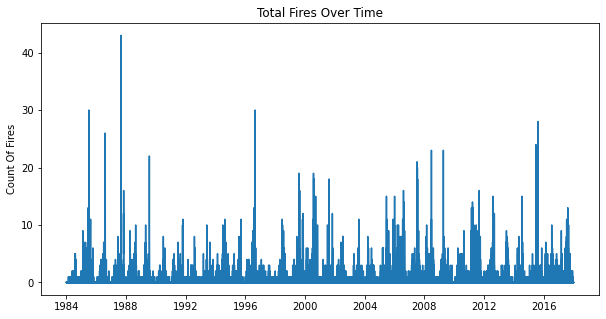

In [31]:
plt.figure(figsize=(10,5))
plt.plot('Date', 'Total_fires', data = data)
plt.ylabel('Count Of Fires')
plt.title('Total Fires Over Time')
plt.show()

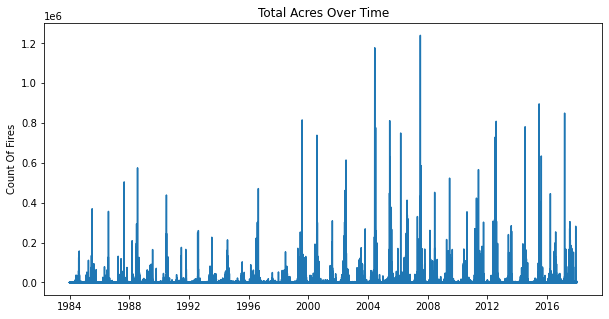

In [32]:
plt.figure(figsize=(10,5))
plt.plot('Date', 'Total_acres', data = data)
plt.ylabel('Count Of Fires')
plt.title('Total Acres Over Time')
plt.show()

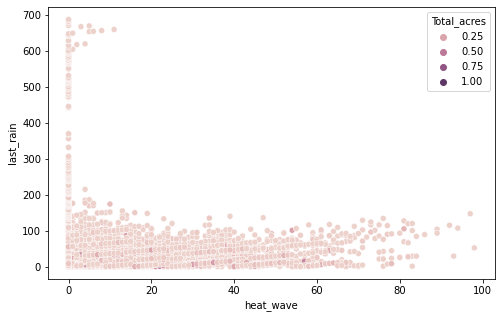

In [33]:
plt.figure(figsize= (8,5))
sns.scatterplot(x = 'heat_wave', y = 'last_rain', hue = 'Total_acres', data = data.loc[data['Total_fires'] > 0])
plt.show()

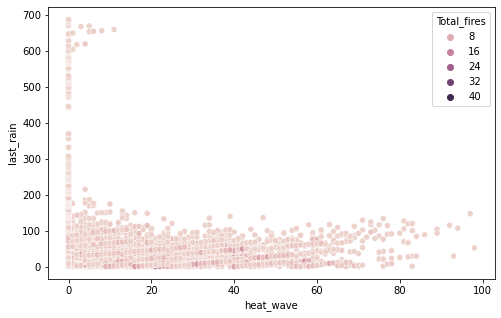

In [34]:
plt.figure(figsize= (8,5))
sns.scatterplot(x = 'heat_wave', y = 'last_rain', hue = 'Total_fires', data = data.loc[data['Total_fires'] > 0])
plt.show()

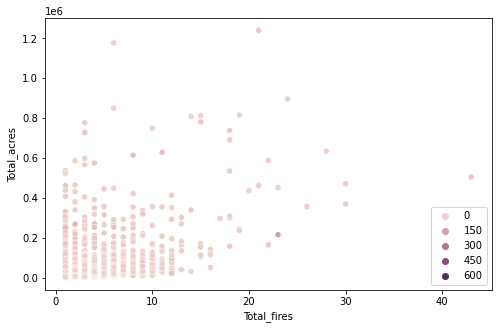

In [35]:
plt.figure(figsize= (8,5))
sns.scatterplot(x = 'Total_fires', y = 'Total_acres', hue = 'last_rain', data = data.loc[data['Total_fires'] > 0])
plt.legend(loc='lower right')
plt.show()

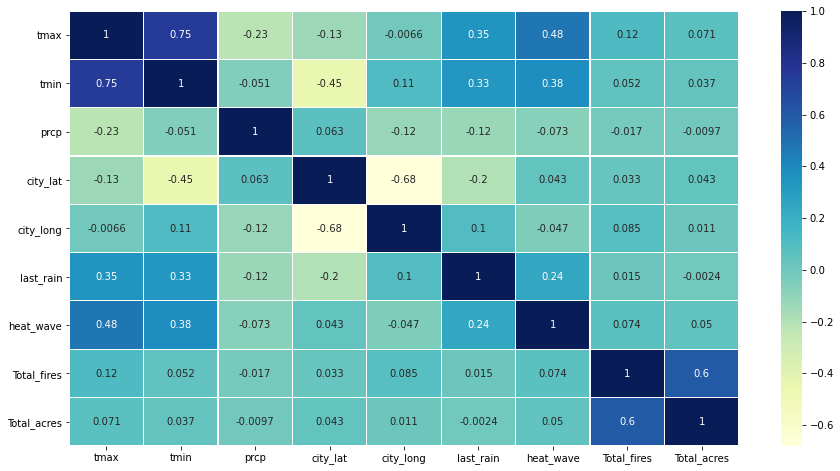

In [36]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.show()
